<a href="https://colab.research.google.com/github/nimish1402/Dog-Vs-Cat-CNN-Prediction-model-/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import dataset from kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:10<00:00, 180MB/s]
100% 1.06G/1.06G [00:10<00:00, 108MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall('/content')
zip_ref.close()

#importing the dependencies

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, BatchNormalization ,Dropout

In [5]:
#generators (divides the images in batches which helps in saving RAM )
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels ='inferred',
    label_mode ='int',        #cats =0 , dogs = 1
    batch_size =32,
    image_size=(256, 256)     #reshapint the image size
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels ='inferred',
    label_mode ='int',
    batch_size =32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


**Normalize**

In [6]:
#the images stored here is stored in form of numpy array having pixel values from 0 - 256
# we need to change the value from (0-256) -> (0,1)

def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# we needed to do this step cuz every pixel was ranging between 0 - 255 we wanted that image tp have pixel values ranging between 0 - 1

#Model Building

model Architecture :

1st Layer - 32 filter

2nd layer - 64 filters

3rd layer - 128 layer


In [7]:
#CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides=2,padding='valid' ))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides=2,padding='valid' ))


model.add(Conv2D(128, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides=2,padding='valid' ))

model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dropout(0,1))

model.add(Dense(64, activation ='relu'))
model.add(Dropout(0,1))

model.add(Dense(1, activation ='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

compiling model

In [9]:
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(train_ds, epochs =10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 107ms/step - loss: 1.0673 - accuracy: 0.6163 - val_loss: 0.6392 - val_accuracy: 0.6612
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5572 - accuracy: 0.7243 - val_loss: 0.7731 - val_accuracy: 0.6026
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4986 - accuracy: 0.7637 - val_loss: 0.6016 - val_accuracy: 0.6838
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4172 - accuracy: 0.8124 - val_loss: 0.5466 - val_accuracy: 0.7572
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3582 - accuracy: 0.8397 - val_loss: 0.5037 - val_accuracy: 0.7686
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2927 - accuracy: 0.8716 - val_loss: 0.5920 - val_accuracy: 0.7518
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2240 - accuracy: 0.9029 - val_loss: 0.6228 - val_ac

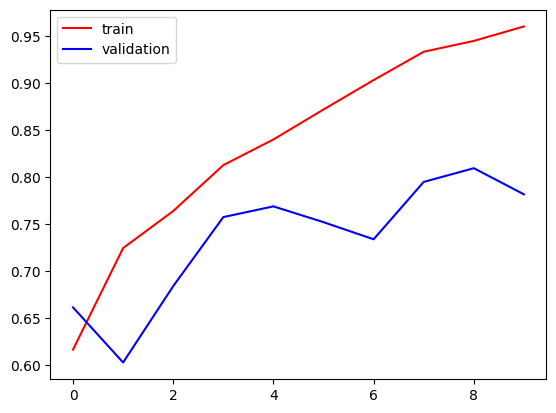

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red',label ='train')
plt.plot(history.history['val_accuracy'], color='blue',label ='validation')
plt.legend()
plt.show()
# this graph tells about the overfitting(this means the model works good with training data but not with test data)

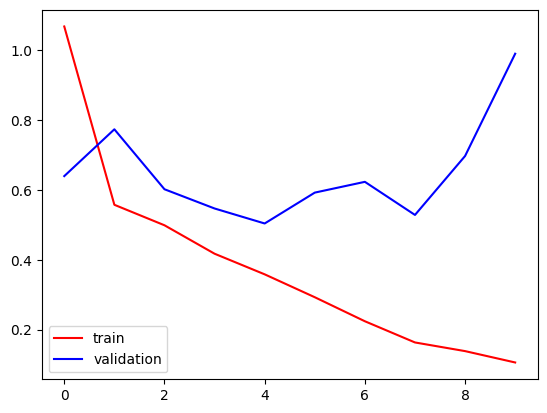

In [12]:
plt.plot(history.history['loss'], color='red',label ='train')
plt.plot(history.history['val_loss'], color='blue',label ='validation')
plt.legend()
plt.show()

In [13]:
#ways to reduce overfitting

# 1 add more data
# 2 Data Augmentation
# 3 L1/L2 Regualizer
# 4 Dropout
# 5 Batch Norm
# 6 Reduce Complexity

#Reducing Overfitting

1 Batch Normalization

In [14]:
# to do batch normalization apply batch norm in the layers part ^
# and apply changes in the model

#to check the model

In [15]:
import cv2

In [34]:
test_img1 = cv2.imread('/content/d2.png')

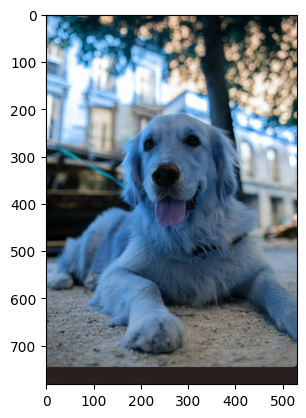

In [35]:
plt.imshow(test_img1)

In [36]:
test_img2 = cv2.imread('/content/c1.png')

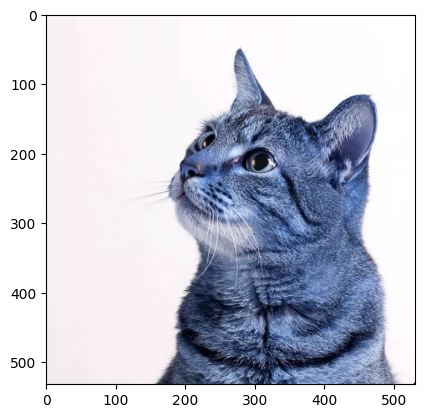

In [37]:
plt.imshow(test_img2)

In [38]:
test_img1.shape

(782, 530, 3)

In [39]:
test_img2.shape

(532, 531, 3)

In [40]:
# resizing the image
test_img1 = cv2.resize(test_img1, (256,256))
test_img2 = cv2.resize(test_img2 ,(256,256))

In [41]:
# converting the test image to a 4d tensor
test_input1 = test_img1.reshape((1,256,256,3))
test_input2 = test_img2.reshape((1,256,256,3))

In [42]:
model.predict(test_input1)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [43]:
model.predict(test_input2)

1/1 [==============================] - 0s 25ms/step


array([[0.]], dtype=float32)